In [24]:
import numpy as np
import matplotlib.pyplot as plt

x1 = [3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 1, 2, 1, 3, 1]
x2 = [3, 2, 2, 1, 2, 1, 2, 3, 2, 1, 1, 2, 1, 3, 1]
x3 = [1, 3, 3, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 3, 1]
x4 = [2, 1, 2, 2, 3, 2, 3, 1, 2, 2, 2, 2, 1, 3, 1]
x5 = [2, 3, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1]

#標本化
x1_h = ( x1-np.mean(x1) ) / np.std(x1, ddof=1)
x2_h = ( x2-np.mean(x2) ) / np.std(x2, ddof=1)
x3_h = ( x3-np.mean(x3) ) / np.std(x3, ddof=1)
x4_h = ( x4-np.mean(x4) ) / np.std(x4, ddof=1)
x5_h = ( x5-np.mean(x4) ) / np.std(x5, ddof=1)

#データの結合
data = np.array([x1_h, x2_h, x3_h, x4_h, x5_h]).T

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit( data )
Ans = model.labels_
Ans

array([1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 3, 1, 3, 0, 3])

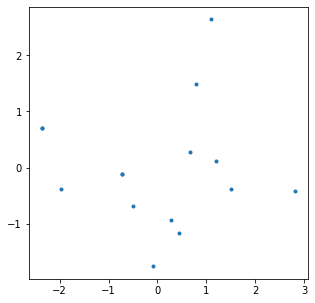

In [7]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit( data )
z = model.transform( data )

fig = plt.figure(figsize = (5,5) )
plt.plot(z[:,0], z[:,1],'.')

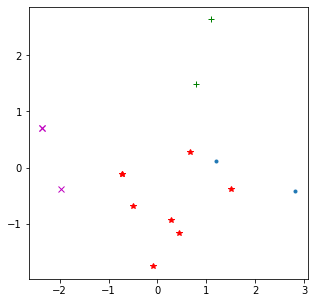

In [9]:
c1 = z[np.where(Ans == 0)[0], :]
c2 = z[np.where(Ans == 1)[0], :]
c3 = z[np.where(Ans == 2)[0], :]
c4 = z[np.where(Ans == 3)[0], :]

fig = plt.figure(figsize=(5, 5))
plt.plot(c1[:,0], c1[:,1], '.')
plt.plot(c2[:,0], c2[:,1], 'r*')
plt.plot(c3[:,0], c3[:,1], 'g+')
plt.plot(c4[:,0], c4[:,1], 'mx')

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(data,Ans);

In [22]:
model.predict( [ [3, 3, 1, 3, 3], ])

array([0])

In [23]:
model.predict(data)

array([1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 3, 1, 3, 0, 3])